In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabities data

diabetes = datasets.load_diabetes()
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [2]:
x=diabetes.data
y=diabetes.target
columns = diabetes.feature_names
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
diabetes_df=pd.DataFrame(diabetes.data)
diabetes_df.columns = columns
diabetes_df.head()
print(diabetes_df.shape)
diabetes_df.describe()


(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [4]:
diabetes_df['target']=diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3-Q1

l = Q1 - 1.5*(Q3-Q1)
m =Q3 + 1.5*(Q3-Q1)


# print((diabetes_df<l)) or (diabetes_df>m)

In [6]:
diabetes_df_out = diabetes_df[~((diabetes_df < (Q1 - 1.5 * IQR)) |(diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_df_out.shape
diabetes_df_out

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


In [7]:
# x=diabetes.data
# y=diabetes.target
# columns = diabetes.feature_names
# columns
x=diabetes_df_out.iloc[:,:-1].values
y=diabetes_df_out.iloc[:,-1].values

print(x.shape)
print(y.shape)

(409, 10)
(409,)


<AxesSubplot:xlabel='bmi'>

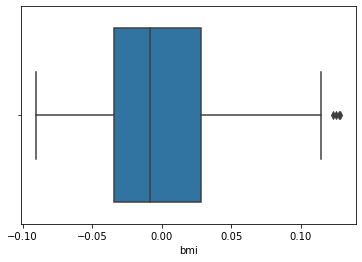

In [8]:
import seaborn as sns
sns.boxplot(x=diabetes_df_out['bmi'])

In [9]:
# print(diabetes)

In [10]:
xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size = 0.4, random_state = 0)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(245, 10) (164, 10) (245,) (164,)


In [11]:
# Creating LinearRegression Object
print(ytest)
regr= linear_model.LinearRegression()

[ 63. 230. 249. 132. 134.  94. 187. 131. 128. 215.  88. 292.  52.  90.
 179. 179. 220. 127.  88. 122.  96.  51.  88. 272. 126. 242. 160. 198.
 171.  79. 113.  71. 192.  77.  90. 128. 293. 200. 296. 140.  91. 201.
 220.  49. 138.  75. 140.  66.  52.  70.  71. 168.  81. 131. 243. 145.
  99. 311. 137. 221. 274. 182. 101.  85. 142. 336. 135. 182.  66.  95.
 235.  97.  90. 101.  64.  63.  68. 270.  68.  53. 118. 183.  63. 198.
 136. 252.  97.  37. 131.  59. 150. 197. 181. 113. 332. 190. 146. 182.
 248. 170. 110. 202.  84. 156. 154. 200. 303. 104. 104. 150.  94. 178.
  71.  40. 141.  59. 110. 115. 118. 128. 175.  96.  72.  49.  72. 257.
  72. 225.  74.  90. 150.  78.  77. 220. 172. 199. 178. 115. 107.  53.
 200.  70.  52. 144. 191. 178.  59. 200.  69. 144.  39. 241. 151. 173.
 123.  99. 158. 275.  72.  60. 124. 107. 113. 244.]


In [12]:
#  Training the model using the training set
regr.fit(xtrain,ytrain)
print(xtrain.shape)
diabt_pred = regr.predict(xtest)
print(diabt_pred.shape)
print(diabt_pred)

(245, 10)
(164,)
[107.09839276 293.51013463 214.35560167 274.93159001  70.58352943
  99.66389962 144.31002427 162.56120726  98.82612442 256.63884041
 115.28151619 191.81166106  59.44146135  45.84268699 115.11085281
 162.84489284 273.30818785 162.39213795 112.2614526  193.44845194
 113.29533956 122.3074644  147.80534898 203.75050412 192.24347438
 185.28587231 116.64058851 210.08689806 173.40203713 111.42862118
  82.835768    84.76196643 232.5894479   79.70736359 147.18080872
 235.35781172 198.60169183  72.95212036 221.26350254 171.73743103
 149.07726214  88.85647242 212.78915066 125.89885969  70.84382154
  66.30612522 138.01183422 175.41439864 218.62362942  59.27152259
 112.36457427 139.65246944  98.89452864 170.12202892 285.62408604
 122.95663492 245.00182864 172.86033205 205.51680217 218.61285695
 247.04571436 136.52235286  91.4054827  183.9463271  113.67803076
 261.06300582 123.51299662 157.18277741 123.62373242 154.93687734
 178.81357325 110.34849707 109.10486942 198.71737965  90.21

In [13]:
# Print the coeffiecients
print("The regression coeffiecients: ", regr.coef_)
# The intercept
print("The regression intercept: ", regr.intercept_)

# Mean Squared Error
print("The Mean Squared error: ", mean_squared_error(ytest,diabt_pred))

#R2 score
print("The R2 score is:", r2_score(ytest,diabt_pred))



The regression coeffiecients:  [  -3.03810926 -220.4082616   576.3963705   266.90947812 -512.03718999
  209.6541476     3.28911753  123.62950535  812.8713911    18.37708089]
The regression intercept:  154.7247794009157
The Mean Squared error:  3072.070515733775
The R2 score is: 0.36136439740619664
